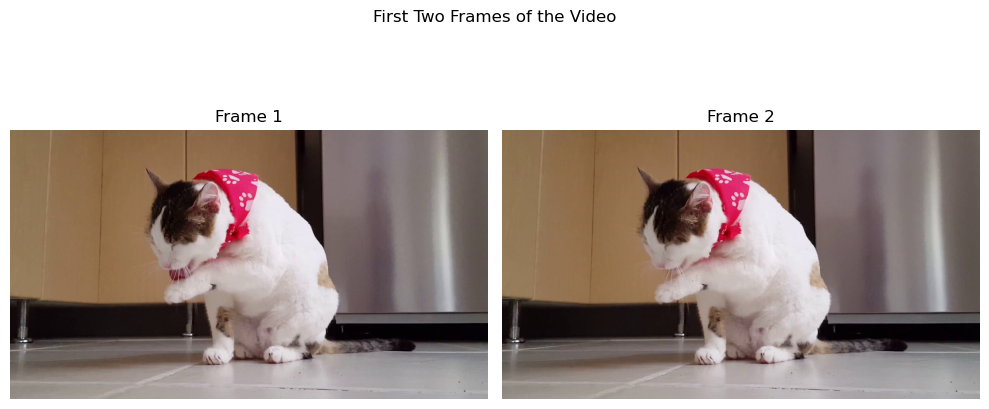

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video
video_path = r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\855029-hd_1920_1080_30fps.mp4"
cap = cv2.VideoCapture(video_path)

# Read the first two frames
ret, frame1 = cap.read()
ret2, frame2 = cap.read()

if not ret or not ret2:
    print("Error: Unable to read video frames.")
    cap.release()
    exit()

# Convert the frames to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Display the first two frames side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title("Frame 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title("Frame 2")
plt.axis("off")
plt.suptitle("First Two Frames of the Video")
plt.tight_layout()
plt.show()

# Parameters for Shi-Tomasi corner detection (feature detection)
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Parameters for Lucas-Kanade Optical Flow
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Detect good features to track
old_pts = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(frame1)

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow
    new_pts, status, err = cv2.calcOpticalFlowPyrLK(gray1, gray_frame, old_pts, None, **lk_params)

    # Select good points
    if new_pts is not None and status is not None:
        good_new = new_pts[status == 1]
        good_old = old_pts[status == 1]

        # Draw the tracks
        for new, old in zip(good_new, good_old):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, (0, 0, 255), -1)

        output = cv2.add(frame, mask)
        cv2.imshow("Lucas-Kanade Optical Flow", output)

        # Update previous frame and points
        gray1 = gray_frame.copy()
        old_pts = good_new.reshape(-1, 1, 2)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        print("Tracking failed.")
        break

cap.release()
cv2.destroyAllWindows()


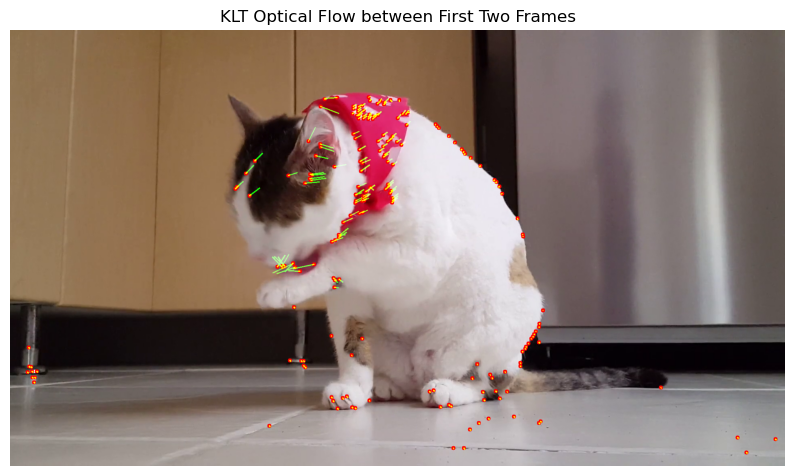

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load video
video_path = r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\855029-hd_1920_1080_30fps.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Read first frame
ret1, frame1 = cap.read()

# Skip a few frames to ensure noticeable motion
for _ in range(10):
    cap.read()

# Read second frame
ret2, frame2 = cap.read()
cap.release()

if not ret1 or not ret2:
    print("Error: Unable to read frames.")
    exit()

# Convert to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Detect good features to track in first frame
feature_params = dict(
    maxCorners=200,
    qualityLevel=0.01,
    minDistance=5,
    blockSize=7
)
p0 = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

if p0 is None:
    print("No good features found in the first frame.")
    exit()

# Parameters for Lucas-Kanade Optical Flow
lk_params = dict(
    winSize=(15, 15),
    maxLevel=2,
    criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)
)

# Calculate Optical Flow
p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

# Create mask image for drawing
mask = np.zeros_like(frame1)

if p1 is not None and st is not None:
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Draw tracks
    for new, old in zip(good_new, good_old):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
        frame2 = cv2.circle(frame2, (int(a), int(b)), 5, (0, 0, 255), -1)

    # Overlay optical flow on frame
    output = cv2.add(frame2, mask)
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    # Plotting
    plt.figure(figsize=(10, 7))
    plt.imshow(output_rgb)
    plt.title("KLT Optical Flow between First Two Frames")
    plt.axis("off")
    plt.show()

else:
    print("Optical flow calculation failed.")


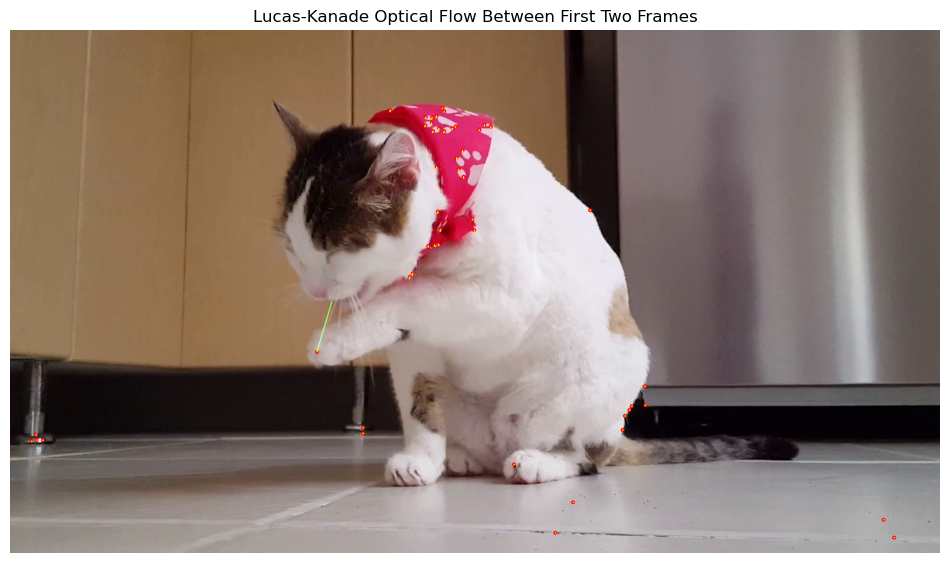

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load video
video_path = r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\855029-hd_1920_1080_30fps.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Read first two frames
ret1, frame1 = cap.read()
ret2, frame2 = cap.read()
cap.release()

if not ret1 or not ret2:
    print("Error: Unable to read the first two frames.")
    exit()

# Convert to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Detect good features to track
feature_params = dict(maxCorners=300, qualityLevel=0.2, minDistance=7, blockSize=7)
p0 = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

if p0 is None:
    print("No good features found.")
    exit()

# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize=(21, 21), maxLevel=3,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 30, 0.01))

# Calculate optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

# Create a mask image for drawing
mask = np.zeros_like(frame1)

# Select good points
if p1 is not None and st is not None:
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Draw optical flow lines
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        # Draw the motion line in green
        mask = cv2.line(mask, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2)
        # Draw the current point in red
        frame2 = cv2.circle(frame2, (int(a), int(b)), 4, (0, 0, 255), -1)

    # Overlay the lines on the image
    output = cv2.add(frame2, mask)
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
    plt.figure(figsize=(12, 7))
    plt.imshow(output_rgb)
    plt.title("Lucas-Kanade Optical Flow Between First Two Frames")
    plt.axis("off")
    plt.show()

else:
    print("Optical flow calculation failed.")


In [7]:
import cv2
import numpy as np

video_path = r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\855029-hd_1920_1080_30fps.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

ret, frame1 = cap.read()
if not ret:
    print("Error: Unable to read the first frame.")
    exit()

gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
p0 = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

mask = np.zeros_like(frame1)

while True:
    ret, frame2 = cap.read()
    if not ret:
        break

    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

    if p1 is not None and st is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for new, old in zip(good_new, good_old):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            frame2 = cv2.circle(frame2, (int(a), int(b)), 5, (0, 0, 255), -1)

        output = cv2.add(frame2, mask)
        cv2.imshow("KLT Optical Flow", output)

        gray1 = gray2.copy()
        p0 = good_new.reshape(-1, 1, 2)

        if cv2.waitKey(25) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

In [9]:
import cv2
import numpy as np

cap = cv2.VideoCapture( r"C:\Users\DELL\OneDrive\Desktop\Afraa\Images\855029-hd_1920_1080_30fps.mp4")

if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

ret, frame1 = cap.read()
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

p0 = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

mask = np.zeros_like(frame1)

while True:
    ret, frame2 = cap.read()
    if not ret:
        break

    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

    if p1 is not None and st is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for new, old in zip(good_new, good_old):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            frame2 = cv2.circle(frame2, (int(a), int(b)), 5, (0, 0, 255), -1)

        output = cv2.add(frame2, mask)
        cv2.imshow("Lucas-Kanade Optical Flow", output)

        gray1 = gray2.copy()
        p0 = good_new.reshape(-1, 1, 2)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


